In [163]:
# Import the required libraries

import pandas as pd, numpy as np, seaborn as sns, matplotlib.pyplot as plt
from xgboost import XGBClassifier, XGBRegressor
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import classification_report, accuracy_score
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [164]:
# A function to print the accuracy score for test and training data

def get_accuracy(X_train, X_test, y_train, y_test, model):
  return{'Test Accuracy': accuracy_score(y_test, model.predict(X_test)),
          'Train Accuracy': accuracy_score(y_train, model.predict(X_train))}

## **Task 1: Bank Customer Churn Prediction**

In [165]:
df= pd.read_csv('churndata_processed2.csv')
df[:5]

,YEARS_WITH_BANK,CHURN,RISK_RATING,AVERAGE_BALANCE,MOBILE_APP_ADOPTION,INTERNET_BANKING_ADOPTION,USSD_BANKING_ADOPTION,DIGITAL_LOAN,UNSECURED_LOAN,TERMLOAN_STATUS,...,SUBSEGMENT_product5,SUBSEGMENT_product6,SUBSEGMENT_product7,SUBSEGMENT_product8,SUBSEGMENT_product9,SCHEME_TYPE_LAA,SCHEME_TYPE_ODA,SCHEME_TYPE_SBA,SCHEME_TYPE_TDA,SCHEME_TYPE_TUA
0,1.0,0,0.8,0.251052,0,0,0,0,0,0,...,0,0,1,0,0,0,1,0,0,0
1,0.5,1,0.8,0.283956,1,1,0,0,0,0,...,0,0,1,0,0,0,0,1,0,0
2,1.0,1,1.0,0.344594,0,0,1,0,0,0,...,0,1,0,0,0,0,0,1,0,0
3,1.0,0,1.0,0.404608,0,1,1,0,0,0,...,0,1,0,0,0,0,1,0,0,0
4,1.0,1,1.0,0.268983,1,1,1,0,0,0,...,0,0,0,1,0,0,0,1,0,0


In [166]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 489074 entries, 0 to 489073
Data columns (total 38 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   YEARS_WITH_BANK               489074 non-null  float64
 1   CHURN                         489074 non-null  int64  
 2   RISK_RATING                   489074 non-null  float64
 3   AVERAGE_BALANCE               489074 non-null  float64
 4   MOBILE_APP_ADOPTION           489074 non-null  int64  
 5   INTERNET_BANKING_ADOPTION     489074 non-null  int64  
 6   USSD_BANKING_ADOPTION         489074 non-null  int64  
 7   DIGITAL_LOAN                  489074 non-null  int64  
 8   UNSECURED_LOAN                489074 non-null  int64  
 9   TERMLOAN_STATUS               489074 non-null  int64  
 10  CREDIT_CARD                   489074 non-null  int64  
 11  LAST_12_MONTHS_CREDIT_VOLUME  489074 non-null  float64
 12  LAST_12_MONTHS_DEBIT_VOLUME   489074 non-nul

In [167]:
df.CHURN.value_counts()

,count
CHURN,
1,249360
0,239714


In [168]:
y, X= df['CHURN'], df.drop('CHURN', axis= 'columns')

In [169]:
y[:5]

,CHURN
0,0
1,1
2,1
3,0
4,1


In [170]:
X[:5]

,YEARS_WITH_BANK,RISK_RATING,AVERAGE_BALANCE,MOBILE_APP_ADOPTION,INTERNET_BANKING_ADOPTION,USSD_BANKING_ADOPTION,DIGITAL_LOAN,UNSECURED_LOAN,TERMLOAN_STATUS,CREDIT_CARD,...,SUBSEGMENT_product5,SUBSEGMENT_product6,SUBSEGMENT_product7,SUBSEGMENT_product8,SUBSEGMENT_product9,SCHEME_TYPE_LAA,SCHEME_TYPE_ODA,SCHEME_TYPE_SBA,SCHEME_TYPE_TDA,SCHEME_TYPE_TUA
0,1.0,0.8,0.251052,0,0,0,0,0,0,0,...,0,0,1,0,0,0,1,0,0,0
1,0.5,0.8,0.283956,1,1,0,0,0,0,0,...,0,0,1,0,0,0,0,1,0,0
2,1.0,1.0,0.344594,0,0,1,0,0,0,0,...,0,1,0,0,0,0,0,1,0,0
3,1.0,1.0,0.404608,0,1,1,0,0,0,0,...,0,1,0,0,0,0,1,0,0,0
4,1.0,1.0,0.268983,1,1,1,0,0,0,0,...,0,0,0,1,0,0,0,1,0,0


In [171]:
X_train, X_test, y_train, y_test= train_test_split(X, y, test_size=0.2, stratify=y, random_state= 234)

In [172]:
y_train.value_counts()

,count
CHURN,
1,199488
0,191771


In [173]:
# Using default parameters
xgb= XGBClassifier().fit(X_train, y_train)
y_pred= xgb.predict(X_test)

In [174]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.94      0.94      0.94     47943
           1       0.95      0.94      0.94     49872

    accuracy                           0.94     97815
   macro avg       0.94      0.94      0.94     97815
weighted avg       0.94      0.94      0.94     97815



### **Applying SMOTE to make the dataset more balance**

In [175]:
from imblearn.over_sampling import SMOTE

In [176]:
sm= SMOTE(random_state= 234)
X_smo, y_smo= sm.fit_resample(X_train, y_train,)

In [177]:
xgb= XGBClassifier().fit(X_smo, y_smo)
y_pred_smo= xgb.predict(X_test)

In [178]:
print(classification_report(y_test, y_pred_smo))

              precision    recall  f1-score   support

           0       0.94      0.95      0.94     47943
           1       0.95      0.94      0.94     49872

    accuracy                           0.94     97815
   macro avg       0.94      0.94      0.94     97815
weighted avg       0.94      0.94      0.94     97815



In [179]:
get_accuracy(X_smo, X_test, y_smo, y_test, xgb)

{'Test Accuracy': 0.9424219189285897, 'Train Accuracy': 0.9444402670837344}

## **Tuning XGBClassifier**

In [180]:
param_grid=  {'learning_rate': [0.2, 0.1, 0.01],
             'n_estimators' : [50, 100, 400] }
param_grid

{'learning_rate': [0.2, 0.1, 0.01], 'n_estimators': [50, 100, 400]}

In [181]:
model =XGBClassifier(objective='binary:logistic',eval_metric='logloss')

search = GridSearchCV(estimator=model,
                      param_grid=param_grid,
                      scoring="accuracy")

search.fit(X_smo, y_smo)

GridSearchCV(estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False,
                                     eval_metric='logloss', feature_types=None,
                                     gamma=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...=None,
                                     max_cat_threshold=None,
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=None, ...),
             param_grid={'learning_rate': [0.2, 0.1, 0.01],
                         'n_estimators': [50, 100, 400]},
             scoring='accuracy')

In [182]:
search.best_score_

0.9417734412864969

In [183]:
search.best_params_

{'learning_rate': 0.2, 'n_estimators': 400}

In [184]:
import pickle
pickle.dump(search.best_score_, open('cv_gbc.p', 'wb'))

In [185]:
print(get_accuracy(X_train, X_test, y_train, y_test, search.best_estimator_))

{'Test Accuracy': 0.9427183969738793, 'Train Accuracy': 0.947965414214114}


In [186]:
objective= 'binary:logistic'
learning_rate= 0.1
n_estimators= 1000

XGB= XGBClassifier(objective=objective,
                   learning_rate=learning_rate,
                   n_estimators=n_estimators,
                   min_child_weight=4)          # To control overfitting

XGB.fit(X_smo, y_smo)
y_predict= xgb.predict(X_test)
print(get_accuracy(X_train, X_test, y_train, y_test, XGB))

{'Test Accuracy': 0.9426672800695189, 'Train Accuracy': 0.947973081769365}


## **Task 2: Calories Burnt Prediction**

In [126]:
calories= pd.read_csv('calories.csv')
calories.head()

,User_ID,Calories
0,14733363,231.0
1,14861698,66.0
2,11179863,26.0
3,16180408,71.0
4,17771927,35.0


In [127]:
calories.shape

(15000, 2)

In [128]:
exercise= pd.read_csv('exercise.csv')
exercise.head()

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp
0,14733363,male,68,190.0,94.0,29.0,105.0,40.8
1,14861698,female,20,166.0,60.0,14.0,94.0,40.3
2,11179863,male,69,179.0,79.0,5.0,88.0,38.7
3,16180408,female,34,179.0,71.0,13.0,100.0,40.5
4,17771927,female,27,154.0,58.0,10.0,81.0,39.8


In [129]:
exercise.shape

(15000, 8)

In [130]:
data= pd.concat([exercise,calories['Calories']], axis= 1)
data.head()

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,14733363,male,68,190.0,94.0,29.0,105.0,40.8,231.0
1,14861698,female,20,166.0,60.0,14.0,94.0,40.3,66.0
2,11179863,male,69,179.0,79.0,5.0,88.0,38.7,26.0
3,16180408,female,34,179.0,71.0,13.0,100.0,40.5,71.0
4,17771927,female,27,154.0,58.0,10.0,81.0,39.8,35.0


In [131]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   User_ID     15000 non-null  int64  
 1   Gender      15000 non-null  object 
 2   Age         15000 non-null  int64  
 3   Height      15000 non-null  float64
 4   Weight      15000 non-null  float64
 5   Duration    15000 non-null  float64
 6   Heart_Rate  15000 non-null  float64
 7   Body_Temp   15000 non-null  float64
 8   Calories    15000 non-null  float64
dtypes: float64(6), int64(2), object(1)
memory usage: 1.0+ MB


In [132]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
User_ID,15000.0,1.497736e+07,2.872851e+06,10001159.0,12474190.75,14997285.0,17449278.75,19999647.0
Age,15000.0,4.278980e+01,1.698026e+01,20.0,28.00,39.0,56.00,79.0
Height,15000.0,1.744651e+02,1.425811e+01,123.0,164.00,175.0,185.00,222.0
Weight,15000.0,7.496687e+01,1.503566e+01,36.0,63.00,74.0,87.00,132.0
Duration,15000.0,1.553060e+01,8.319203e+00,1.0,8.00,16.0,23.00,30.0
Heart_Rate,15000.0,9.551853e+01,9.583328e+00,67.0,88.00,96.0,103.00,128.0
Body_Temp,15000.0,4.002545e+01,7.792299e-01,37.1,39.60,40.2,40.60,41.5
Calories,15000.0,8.953953e+01,6.245698e+01,1.0,35.00,79.0,138.00,314.0


In [133]:
data.duplicated().any()

False

In [134]:
data.nunique()

,0
User_ID,15000
Gender,2
Age,60
Height,90
Weight,91
Duration,30
Heart_Rate,59
Body_Temp,45
Calories,277


[Text(0.5, 0, 'Gender'), Text(0, 0.5, 'No of customers')]

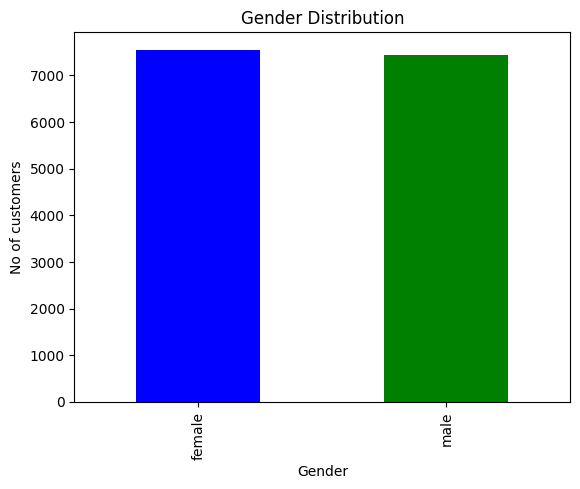

In [135]:
ax= data.Gender.value_counts().plot.bar(color=['blue', 'green'])
ax.set_title('Gender Distribution')
ax.set(xlabel= 'Gender', ylabel= 'No of customers')

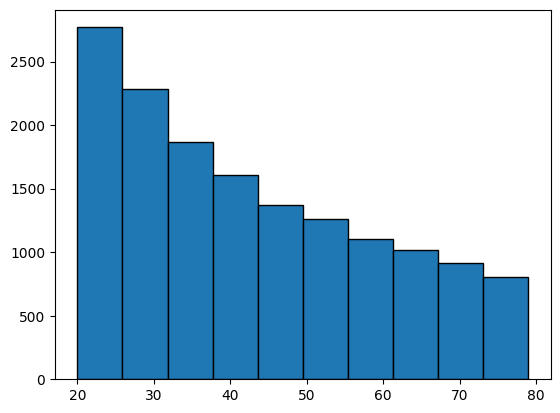

In [136]:
plt.hist(data['Age'], edgecolor='black')
plt.show()

In [137]:
continous_variables= [x for x in data.columns if x not in ['Gender', 'Calories', 'User_ID']]
continous_variables

['Age', 'Height', 'Weight', 'Duration', 'Heart_Rate', 'Body_Temp']

In [138]:
data.head()

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,14733363,male,68,190.0,94.0,29.0,105.0,40.8,231.0
1,14861698,female,20,166.0,60.0,14.0,94.0,40.3,66.0
2,11179863,male,69,179.0,79.0,5.0,88.0,38.7,26.0
3,16180408,female,34,179.0,71.0,13.0,100.0,40.5,71.0
4,17771927,female,27,154.0,58.0,10.0,81.0,39.8,35.0


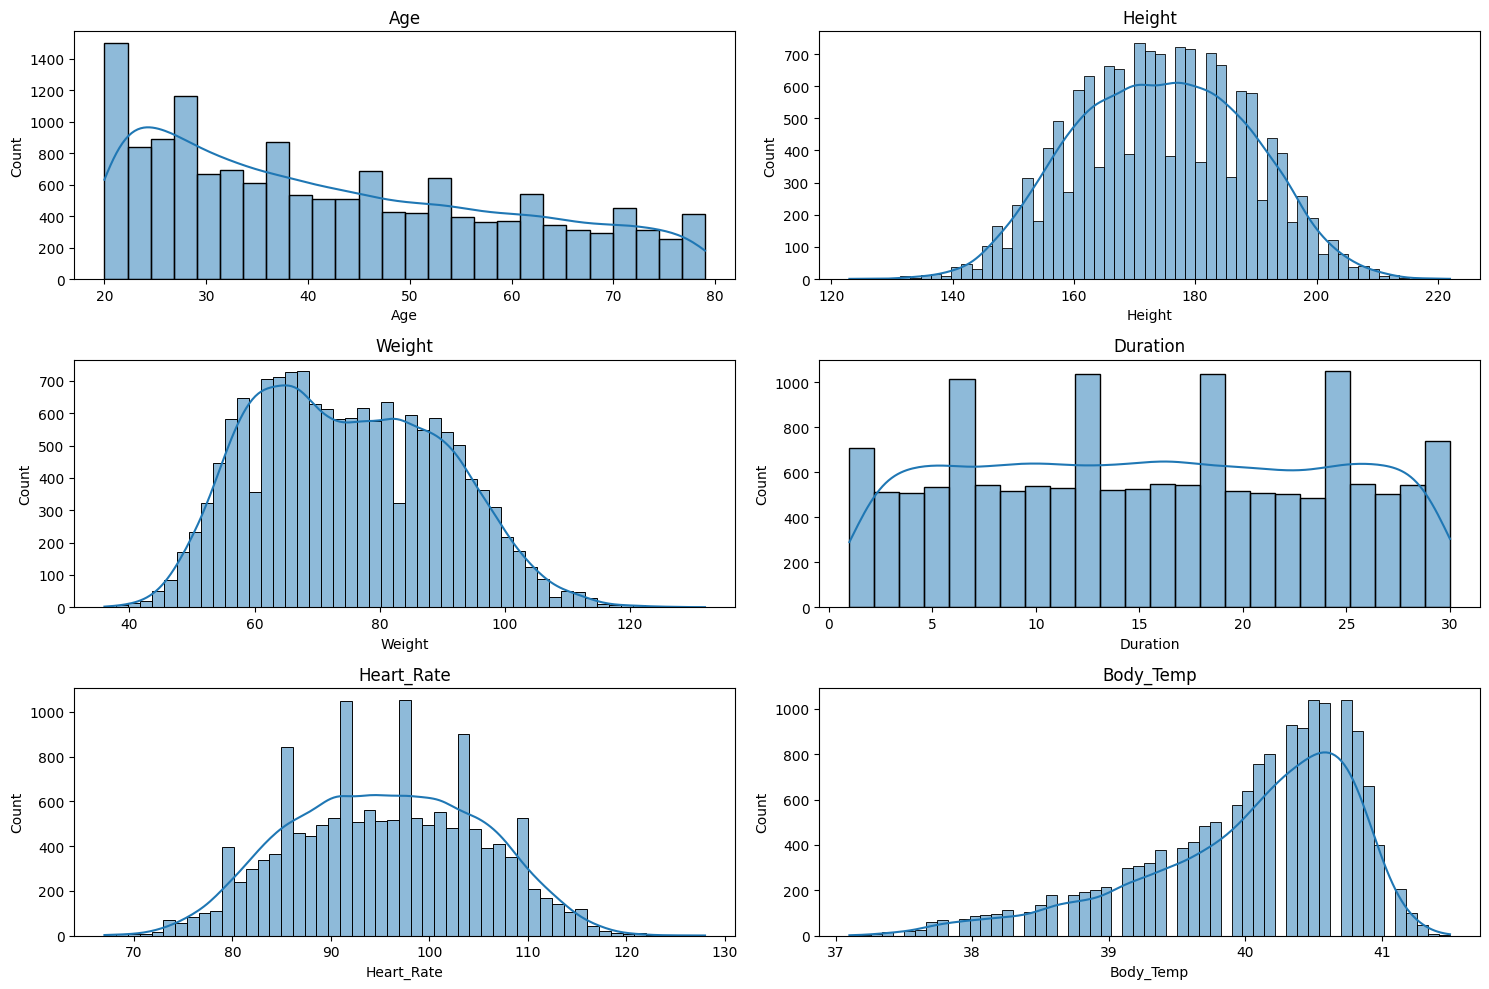

In [139]:
plt.figure(figsize=(15, 10))
for i, column in enumerate(continous_variables, 1):
  plt.subplot(3, 2, i)
  sns.histplot(data[column], kde= True)
  plt.title(column)

plt.tight_layout()
plt.show()

In [140]:
continous_variables=['Age', 'Body_Temp', 'Duration', 'Heart_Rate', 'Height', 'Weight']
continous_variables

['Age', 'Body_Temp', 'Duration', 'Heart_Rate', 'Height', 'Weight']

In [141]:
skewed_columns= (data[continous_variables]
                 .skew()
                 .sort_values(ascending=False))
#skewed_columns= skewed_columns.loc[skewed_columns > 0.75]
skewed_columns

,0
Age,0.473383
Weight,0.226725
Duration,0.004751
Height,-0.006190
Heart_Rate,-0.010704
Body_Temp,-0.994382


<Axes: >

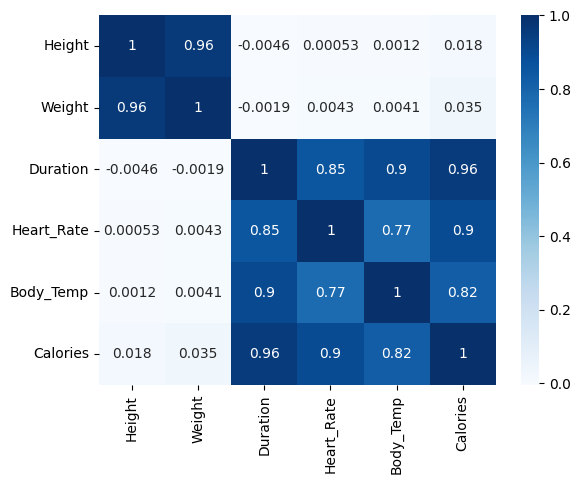

In [142]:
#sns.heatmap(data.select_dtypes('float').corr(), annot=True, cmap= 'Blues')

In [ ]:
sns.heatmap(data[continous_variables]).corr(), annot=True, cmap= 'Blues')

In [143]:
from sklearn.preprocessing import LabelBinarizer, StandardScaler

In [144]:
lb= LabelBinarizer()
data['Gender']= lb.fit_transform(data['Gender'])

In [145]:
data.drop(['User_ID'], axis=1, inplace=True)

## **Standardization**

In [146]:
scaler= StandardScaler()

In [147]:
for column in [continous_variables]:
  data[column]= scaler.fit_transform(data[column])

In [148]:
data[:5]

,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,1,1.484726,1.089582,1.265909,1.619127,0.989404,0.994023,231.0
1,0,-1.342179,-0.593726,-0.995458,-0.183990,-0.158461,0.352342,66.0
2,1,1.543620,0.318066,0.268247,-1.265861,-0.784569,-1.701035,26.0
3,0,-0.517665,0.318066,-0.263839,-0.304198,0.467647,0.609015,71.0
4,0,-0.929922,-1.435380,-1.128480,-0.664821,-1.515029,-0.289338,35.0


### **Splitting the Train/Test set**

In [149]:
# Set up X and y variables
y, X= data['Calories'], data.drop(columns='Calories')

In [150]:
X.shape, y.shape

((15000, 7), (15000,))

In [151]:
# Split train and test set
X_train, X_test, y_train, y_test= train_test_split(X, y, test_size=0.2, random_state=234)

In [152]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((12000, 7), (3000, 7), (12000,), (3000,))

## **Model Building**

In [153]:
model= XGBRegressor().fit(X_train, y_train)
y_pred= model.predict(X_test)

In [157]:
mae= mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = mse**0.5
r2 = r2_score(y_test, y_pred)

In [158]:
print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"R-squared (R²): {r2}")

Mean Absolute Error (MAE): 1.5136780511935553
Mean Squared Error (MSE): 4.761536390810139
Root Mean Squared Error (RMSE): 2.182094496306276
R-squared (R²): 0.9987732493983668
